# Pemodelan Data Penjualan

Notebook ini berisi pemodelan sederhana untuk memprediksi revenue berdasarkan data demografis.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Setting untuk visualisasi
%matplotlib inline

## 1. Membaca Data yang Sudah Dipersiapkan

In [2]:
# Membaca data training dan testing
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').iloc[:, 0]
y_test = pd.read_csv('../data/y_test.csv').iloc[:, 0]

# Memeriksa ukuran data
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (70, 6)
Ukuran data testing: (30, 6)


## 2. Model Regresi Linear

In [3]:
# Membuat model regresi linear
lr_model = LinearRegression()

# Melatih model
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

In [4]:
# Evaluasi model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Hasil Evaluasi Model Regresi Linear:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

Hasil Evaluasi Model Regresi Linear:
Mean Squared Error (MSE): 3799160884901.23
Root Mean Squared Error (RMSE): 1949143.63
Mean Absolute Error (MAE): 1129525.06
R² Score: 0.7126


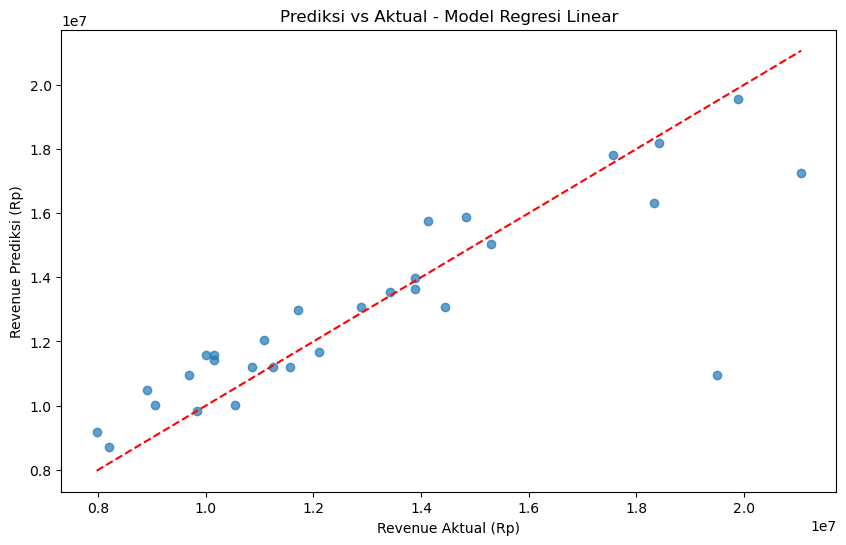

In [5]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Revenue Aktual (Rp)')
plt.ylabel('Revenue Prediksi (Rp)')
plt.title('Prediksi vs Aktual - Model Regresi Linear')
plt.show()

<Figure size 1000x600 with 0 Axes>

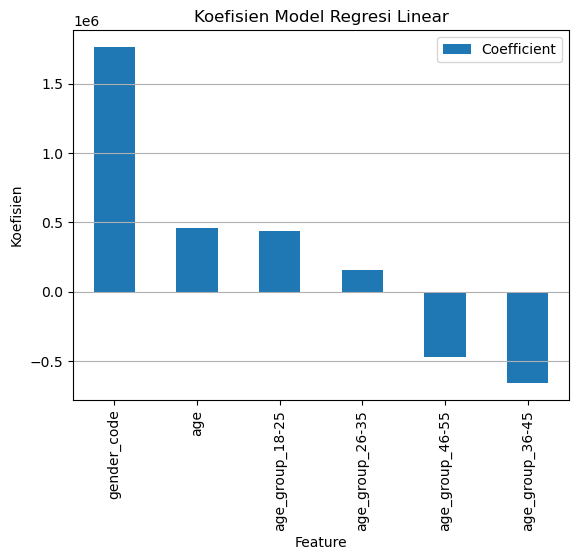

In [6]:
# Melihat koefisien model
features = X_train.columns
coefficients = pd.DataFrame(lr_model.coef_, index=features, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Koefisien Model Regresi Linear')
plt.xlabel('Feature')
plt.ylabel('Koefisien')
plt.grid(axis='y')
plt.show()

## 3. Model Decision Tree

In [7]:
# Membuat model decision tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [8]:
# Evaluasi model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Hasil Evaluasi Model Decision Tree:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"R² Score: {r2_dt:.4f}")

Hasil Evaluasi Model Decision Tree:
Mean Squared Error (MSE): 6253046298859.63
Root Mean Squared Error (RMSE): 2500609.19
Mean Absolute Error (MAE): 1362943.75
R² Score: 0.5269


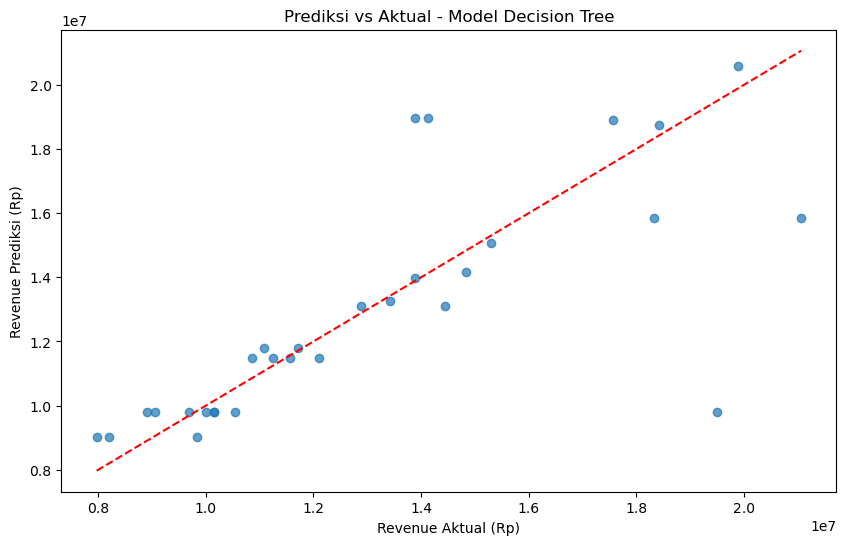

In [9]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Revenue Aktual (Rp)')
plt.ylabel('Revenue Prediksi (Rp)')
plt.title('Prediksi vs Aktual - Model Decision Tree')
plt.show()

<Figure size 1000x600 with 0 Axes>

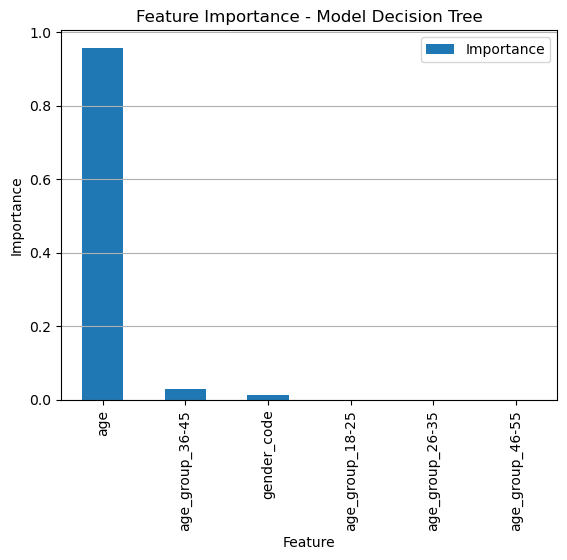

In [10]:
# Melihat feature importance
feature_importance = pd.DataFrame(dt_model.feature_importances_, index=features, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance - Model Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(axis='y')
plt.show()

## 4. Model Random Forest

In [11]:
# Membuat model random forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

In [12]:
# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Hasil Evaluasi Model Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

Hasil Evaluasi Model Random Forest:
Mean Squared Error (MSE): 5764105597919.10
Root Mean Squared Error (RMSE): 2400855.18
Mean Absolute Error (MAE): 1232409.58
R² Score: 0.5639


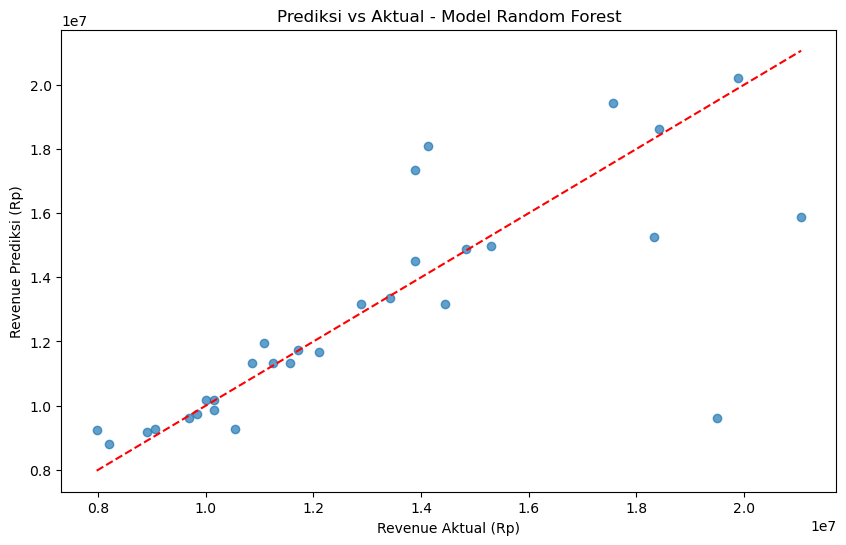

In [13]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Revenue Aktual (Rp)')
plt.ylabel('Revenue Prediksi (Rp)')
plt.title('Prediksi vs Aktual - Model Random Forest')
plt.show()

<Figure size 1000x600 with 0 Axes>

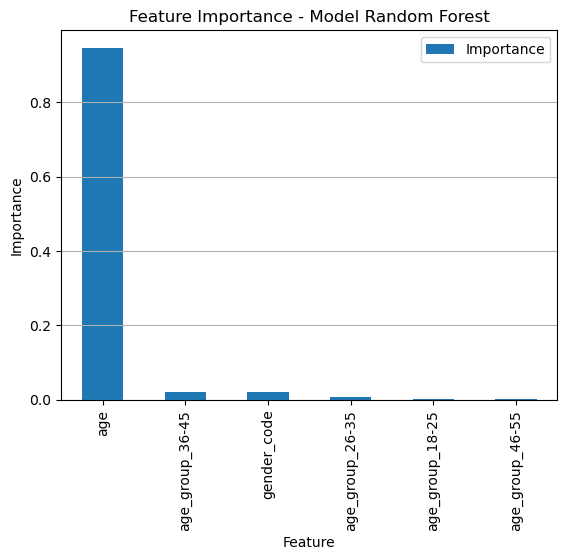

In [14]:
# Melihat feature importance
feature_importance_rf = pd.DataFrame(rf_model.feature_importances_, index=features, columns=['Importance'])
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance - Model Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(axis='y')
plt.show()

## 5. Perbandingan Model

In [15]:
# Membuat dataframe perbandingan
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_dt, mse_rf]
rmse_values = [rmse_lr, rmse_dt, rmse_rf]
mae_values = [mae_lr, mae_dt, mae_rf]
r2_values = [r2_lr, r2_dt, r2_rf]

comparison = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R²': r2_values
})

print("Perbandingan Model:")
comparison

Perbandingan Model:


,Model,MSE,RMSE,MAE,R²
0,Linear Regression,3.799161e+12,1.949144e+06,1.129525e+06,0.712584
1,Decision Tree,6.253046e+12,2.500609e+06,1.362944e+06,0.526942
2,Random Forest,5.764106e+12,2.400855e+06,1.232410e+06,0.563931


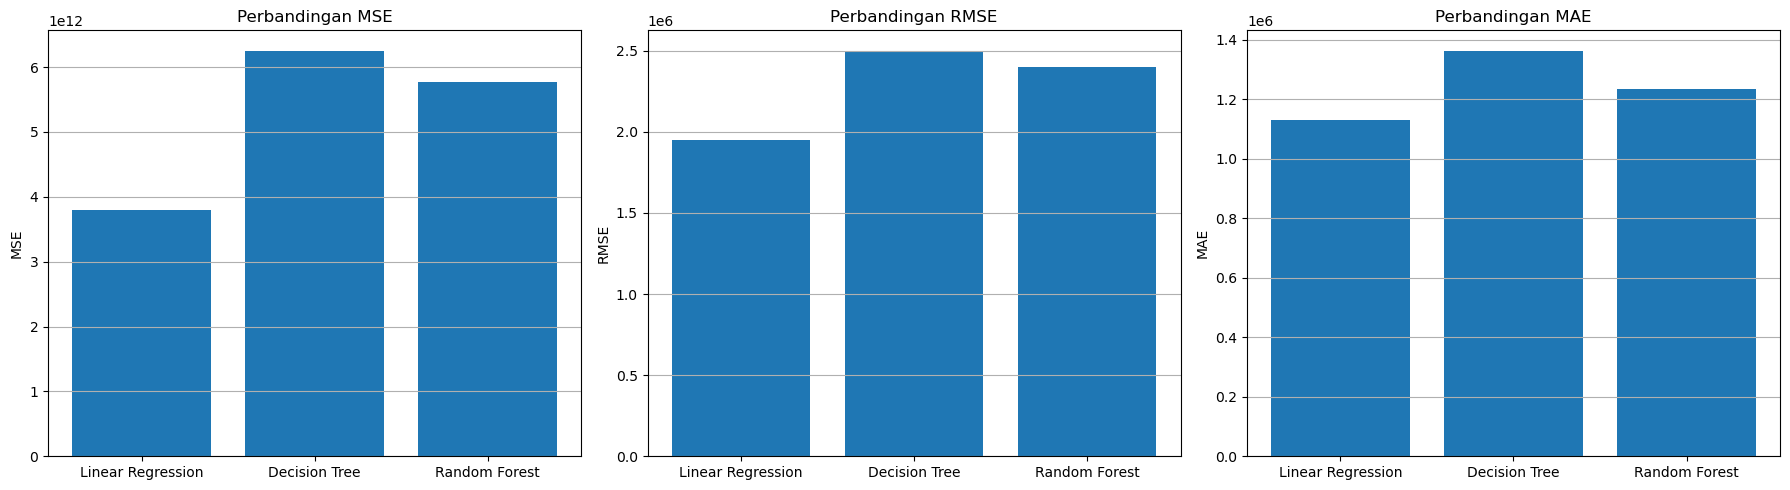

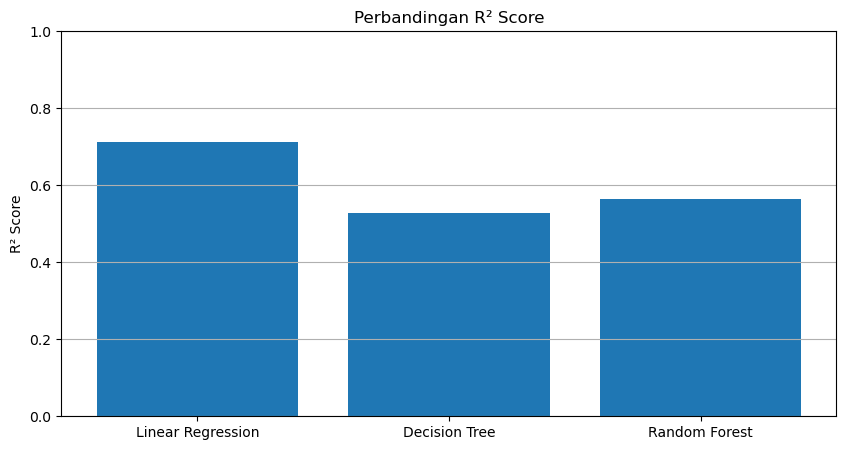

In [16]:
# Visualisasi perbandingan metrik
metrics = ['MSE', 'RMSE', 'MAE']
metric_values = [mse_values, rmse_values, mae_values]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (metric, values) in enumerate(zip(metrics, metric_values)):
    axes[i].bar(models, values)
    axes[i].set_title(f'Perbandingan {metric}')
    axes[i].set_ylabel(metric)
    axes[i].grid(axis='y')
    
plt.tight_layout()
plt.show()

# Visualisasi R² Score
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values)
plt.title('Perbandingan R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # R² biasanya antara 0 dan 1
plt.grid(axis='y')
plt.show()

## 6. Kesimpulan dan Model Terbaik

In [17]:
# Menentukan model terbaik berdasarkan R²
best_model_index = r2_values.index(max(r2_values))
best_model = models[best_model_index]

print(f"Model terbaik berdasarkan R² Score adalah: {best_model}")
print(f"Dengan R² Score: {max(r2_values):.4f}")

# Menyimpan model terbaik
import pickle

if best_model == 'Linear Regression':
    model_to_save = lr_model
elif best_model == 'Decision Tree':
    model_to_save = dt_model
else:
    model_to_save = rf_model
    
# Membuat direktori models jika belum ada
import os
if not os.path.exists('../models'):
    os.makedirs('../models')

# Menyimpan model dalam format pickle
with open('../models/best_model.pkl', 'wb') as file:
    pickle.dump(model_to_save, file)
    
print("Model terbaik telah disimpan sebagai 'best_model.pkl'")

Model terbaik berdasarkan R² Score adalah: Linear Regression
Dengan R² Score: 0.7126
Model terbaik telah disimpan sebagai 'best_model.pkl'
